In [34]:
import numpy as np
import pandas as pd

**Data PreProcessing**

In [35]:
df = pd.read_csv("heartfailure_data.csv")

In [36]:
df.head(5)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

'HeartDisease' is the dependent features, while the remaining are the input features

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


ChestPainType, Sex, ExerciseAngina, ST_Slope,RestingECG are categorical

In [38]:
df.drop_duplicates()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

In [39]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

No missing values

Statistical analysis:

In [40]:
df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

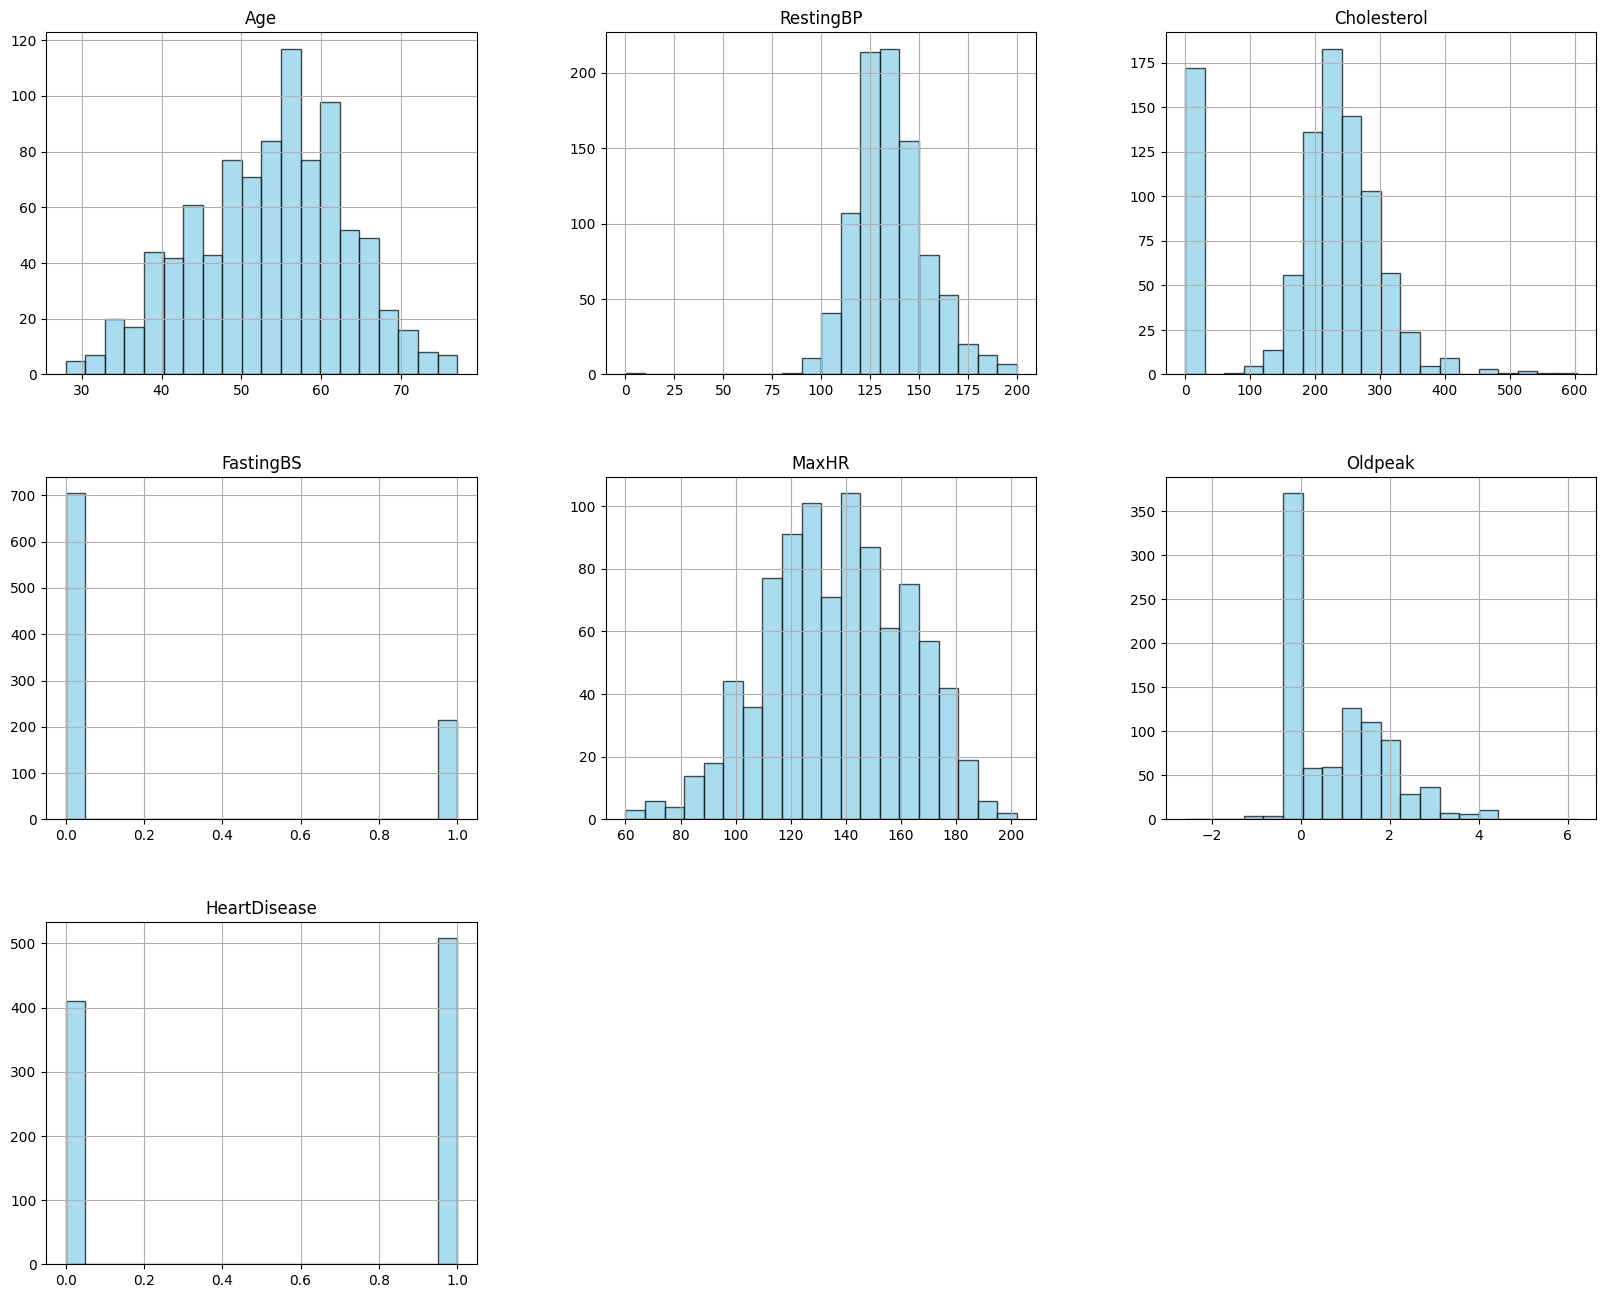

In [42]:
df.hist(bins=20, color='skyblue', edgecolor='black', figsize=(20, 16), alpha=0.7)
plt.show()

The last bar shows, our dataset is not so much imbalanced

Encoding the categorical features

In [43]:
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print(categorical_features)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']


In [44]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for feature in categorical_features:
    df[feature] = label_encoder.fit_transform(df[feature])

In [45]:
df.sample(5)

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
468   62    1              0        152          153          0           2   
161   49    1              0        128          212          0           1   
214   47    1              0        150          226          0           1   
645   57    1              2        128          229          0           0   
767   54    0              2        108          267          0           0   

     MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
468     97               1      1.6         2             1  
161     96               1      0.0         1             1  
214     98               1      1.5         1             1  
645    150               0      0.4         1             1  
767    167               0      0.0         2             0

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    int64  
 2   ChestPainType   918 non-null    int64  
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int64  
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    int64  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int64  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 86.2 KB


All the features now are numerical

Checking correlation of all features with the dependent feature

In [47]:
corr = df.corrwith(df['HeartDisease'])
print(corr.sort_values(ascending = False))

HeartDisease      1.000000
ExerciseAngina    0.494282
Oldpeak           0.403951
Sex               0.305445
Age               0.282039
FastingBS         0.267291
RestingBP         0.107589
RestingECG        0.057384
Cholesterol      -0.232741
ChestPainType    -0.386828
MaxHR            -0.400421
ST_Slope         -0.558771
dtype: float64


Correlation Heatmap

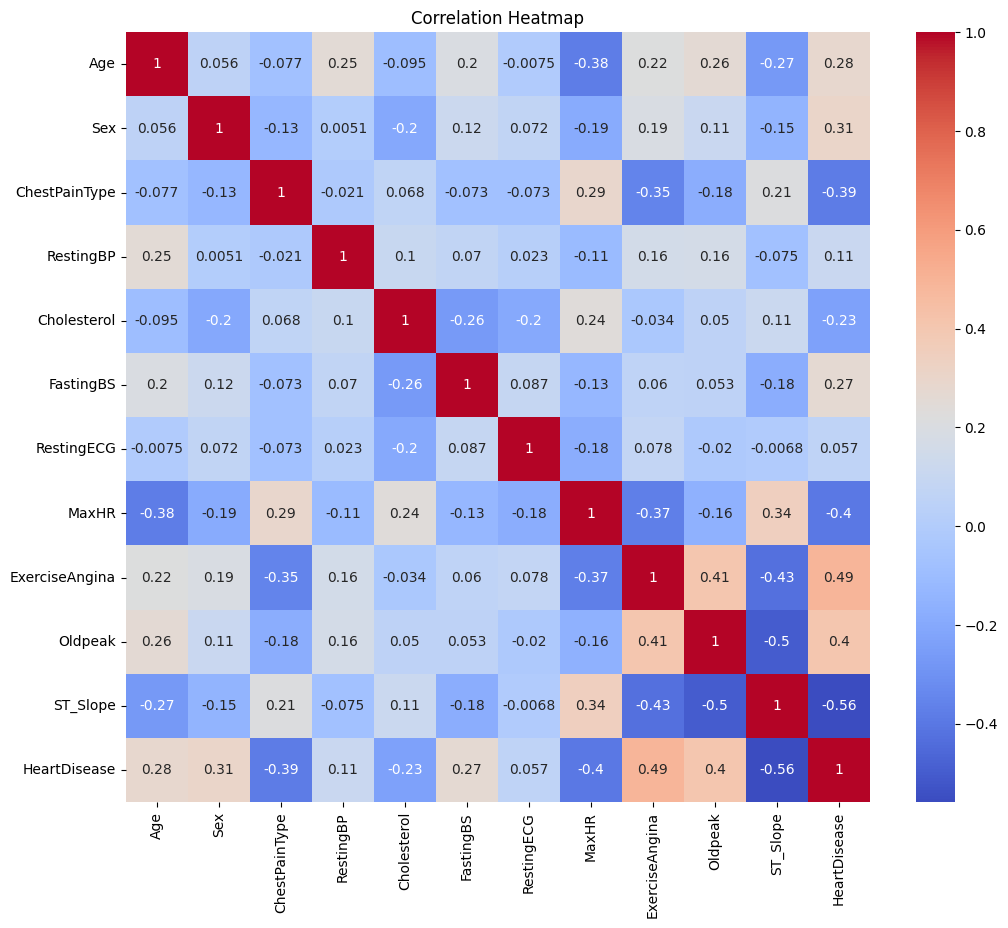

In [48]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Setting independent and dependent variables

In [49]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

Train test split

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42)

Scaling the data

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

Text(0.5, 1.0, 'X_train After Scaling')

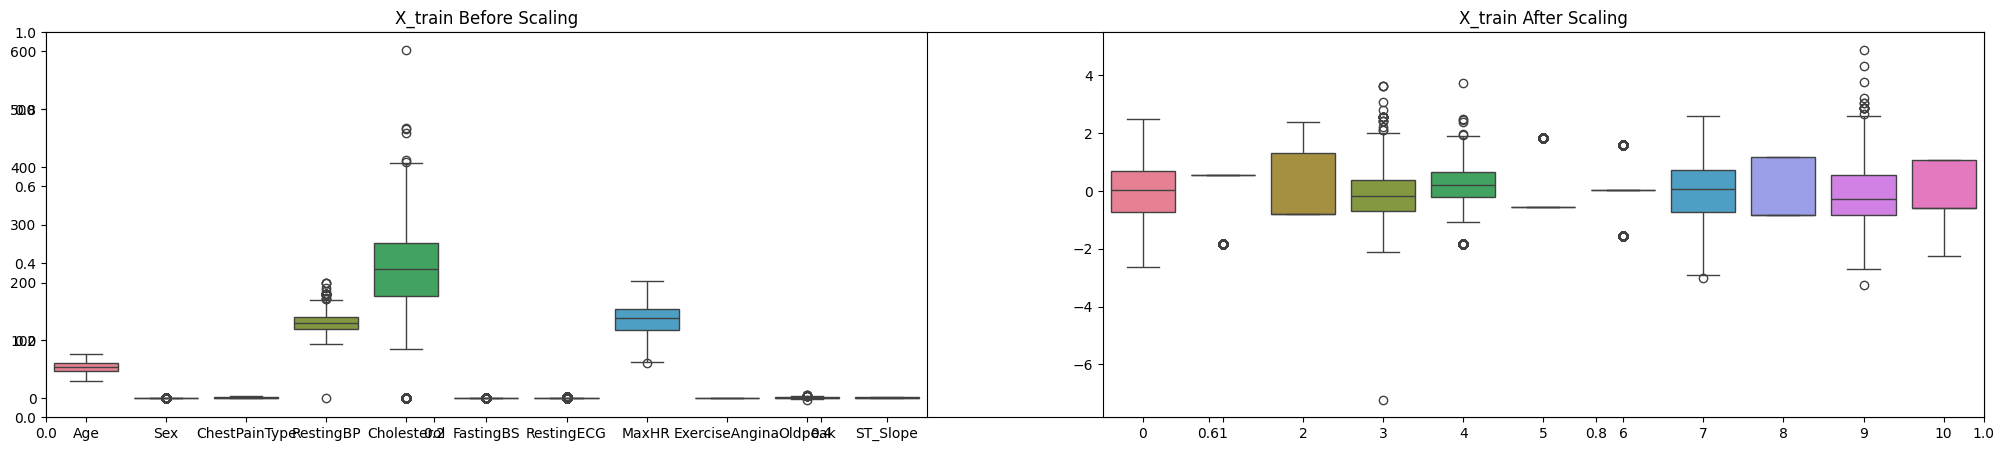

In [52]:
plt.subplots(figsize=(25,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

**Training The Model**

In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam

Build the ANN model

In [54]:
model = Sequential([
    Dense(128, input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),
    Dense(128),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),
    Dense(64),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),
    Dense(32),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

Compile the model

In [55]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [56]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1536      
                                                                 
 batch_normalization_4 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 128)               0         
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_5 (Bat  (None, 128)               512       
 chNormalization)                                     

Train the model

In [57]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test), callbacks=[early_stopping])

Epoch 1/100


23/23 [==============================] - 4s 21ms/step - loss: 0.5765 - accuracy: 0.7071 - val_loss: 0.5414 - val_accuracy: 0.8098
Epoch 2/100
23/23 [==============================] - 0s 7ms/step - loss: 0.4512 - accuracy: 0.8052 - val_loss: 0.4643 - val_accuracy: 0.8533
Epoch 3/100
23/23 [==============================] - 0s 6ms/step - loss: 0.4338 - accuracy: 0.8283 - val_loss: 0.4297 - val_accuracy: 0.8533
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3839 - accuracy: 0.8351 - val_loss: 0.4120 - val_accuracy: 0.8478
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3909 - accuracy: 0.8351 - val_loss: 0.3863 - val_accuracy: 0.8587
Epoch 6/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3797 - accuracy: 0.8406 - val_loss: 0.3750 - val_accuracy: 0.8641
Epoch 7/100
23/23 [==============================] - 0s 6ms/step - loss: 0.3755 - accuracy: 0.8215 - val_loss: 0.3685 - val_accuracy: 0.8587
Epoch 8/100
23/23 [=====

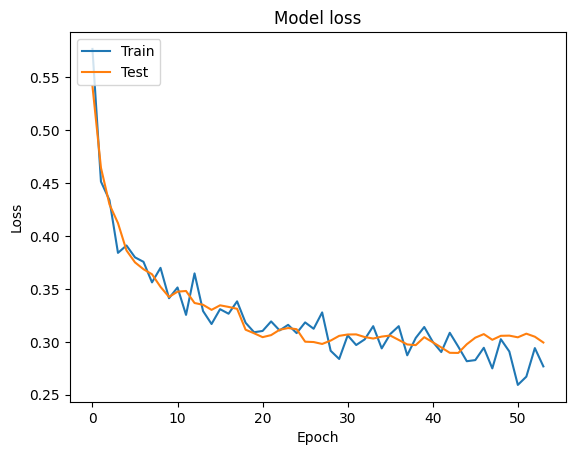

In [58]:
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

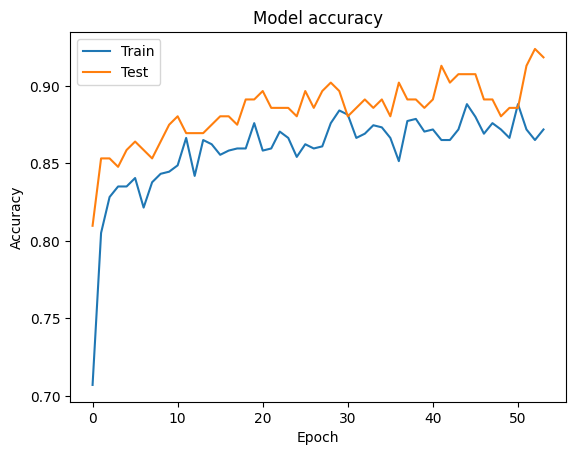

In [59]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

The model is not overfitting that much